In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics
import numpy.ma as ma

In [2]:
exp = diagnostics.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')

Text(0.5, 0, 'time (hours)')

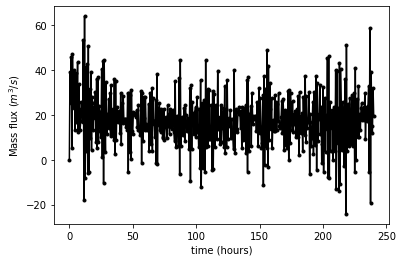

In [3]:
mass_flux = exp.Flux('mass', 0.2, 0.5)
plt.plot(exp.time/3600, mass_flux, 'k.-')
plt.ylabel('Mass flux ($m^3/s$)')
plt.xlabel('time (hours)')

In [4]:
variables = exp.read_vars(['x', 'y', 'z', 'w'])

x = variables['x']
y = variables['y']
z = variables['z']

XZ, ZX = np.meshgrid(x/exp.params['Lx']-0.5, z/exp.params['Lz'])
XY, YX = np.meshgrid(x/exp.params['Lx']-0.5, y/exp.params['Ly'])

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


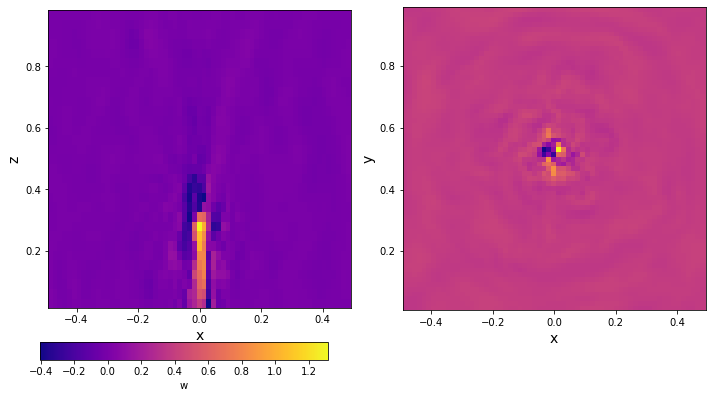

In [5]:
field = variables['w']#/62.5
exp.params['Lx']

n = 70
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('z', fontsize=14)

ax2 = plt.subplot(122)
ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)

cbaxes = fig.add_axes([0.06, -0.01, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w') 

#plt.tight_layout()

# Not rotation

In [4]:
no_rot = diagnostics.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')

Text(0.5, 0, 'time (hours)')

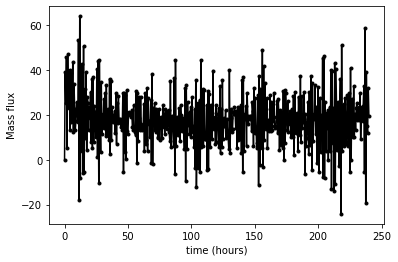

In [5]:
mass_flux = no_rot.Flux('mass', 0.2, 0.5)
plt.plot(no_rot.time/3600, mass_flux, 'k.-')
plt.ylabel('Mass flux')
plt.xlabel('time (hours)')

Text(0.5, 0, 'time (hours)')

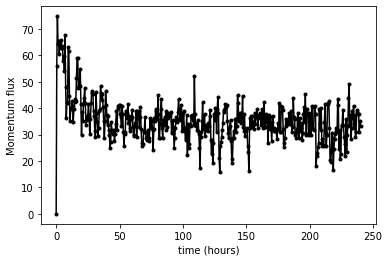

In [6]:
momentum_flux = no_rot.Flux('momentum', 0.35, 0.6)
plt.plot(no_rot.time/3600, momentum_flux, 'k.-')
plt.ylabel('Momentum flux')
plt.xlabel('time (hours)')

Text(0.5, 0, 'time (hours)')

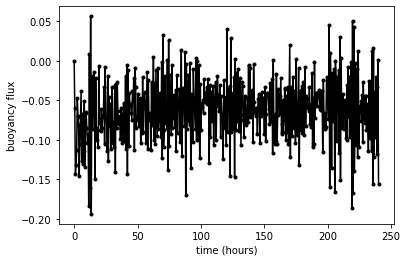

In [7]:
buoyancy_flux = no_rot.Flux('buoyancy', 0.35, 0.6)
plt.plot(no_rot.time/3600, buoyancy_flux, 'k.-')
plt.ylabel('buoyancy flux')
plt.xlabel('time (hours)')

# How to determine the max height of the plume

In [8]:
momentum_flux = no_rot.Flux_levels('momentum', 0.35)

In [9]:
z=no_rot.read_vars(['z'])['z']

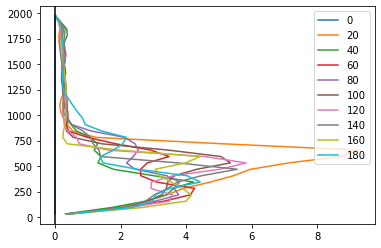

In [10]:
for t in range(0, 200, 20):
    plt.plot(momentum_flux[t], z, label=t)
    
# plt.xlim(-0.00005, 0.00005)
plt.axvline(0, color='k')
plt.legend()

In [11]:
def find_z_plume(array, percent):
    array = np.asarray(array[1:])
    maximum = array.max()
    difference = np.abs(array - maximum*percent)
    idx = difference.argmin()
    return idx+1

In [12]:
nt = momentum_flux.shape[0]
z_plume = np.zeros(nt)
z_plume_2 = np.zeros(nt)
for t in range(momentum_flux.shape[0]):
    z_plume_idx = find_z_plume(momentum_flux[t], 1)
    z_plume[t] = z[z_plume_idx]
    z_plume_idx = find_z_plume(momentum_flux[t], 0.12)
    z_plume_2[t] = z[z_plume_idx]

(0, 1)

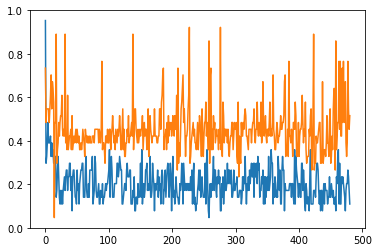

In [13]:
plt.plot(z_plume/2000)
plt.plot(z_plume_2/2000)
plt.ylim(0,1)

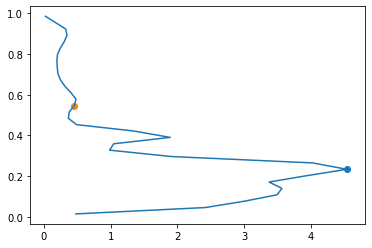

In [14]:
nt = 200
plt.plot(momentum_flux[nt],z/2000)

M_max_idx = np.where(momentum_flux[nt] == momentum_flux[nt].max())[0]
plt.scatter(momentum_flux[nt, M_max_idx], z[M_max_idx]/2000)

z_plume_idx = find_z_plume(momentum_flux[nt], 0.1)

plt.scatter(momentum_flux[nt, z_plume_idx], z[z_plume_idx]/2000)

In [15]:
w = no_rot.read_vars(['w'])['w']/no_rot.params['Lz']
w = diagnostics.velocity_interpolation(w, axis=1)

In [16]:
variables = no_rot.read_vars(['x', 'y', 'z'])

x = variables['x']
y = variables['y']
z = variables['z']

XZ, ZX = np.meshgrid(x/exp.params['Lx']-0.5, z/exp.params['Lz'])
XY, YX = np.meshgrid(x/exp.params['Lx']-0.5, y/exp.params['Ly'])

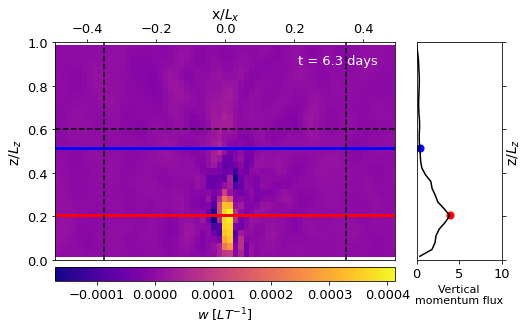

In [21]:
n = 300
time= no_rot.time/3600/24
#maxx = 0.5
#minn = -0.5
Lz = 2000

field = w
z_plume_idx = find_z_plume(momentum_flux[n], 0.1)
M_max_idx = find_z_plume(momentum_flux[n], 1) 

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                             gridspec_kw = {'width_ratios':[4, 1], 'wspace': 0.1}, 
                             sharey=True)
fig.set_size_inches(8,4)

im1 = ax1.pcolormesh(XZ, ZX, w[n, :, 32, :], cmap='plasma',)
                    #vmin=minn, vmax=maxx)
ax1.axhline(z[z_plume_idx]/Lz, c='blue', lw=3)
ax1.axhline(z[M_max_idx]/Lz, c='red', lw=3)
ax1.axhline(0.6, c='k', linestyle='--')
ax1.axvline(0.35, c='k', linestyle='--')
ax1.axvline(-0.35, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.21, 0.9, f't = {no_rot.time[n]/3600/24:0.1f} days', color='w')

ax2.plot(momentum_flux[n], z/Lz, c='k')
ax2.scatter(momentum_flux[n, z_plume_idx], z[z_plume_idx]/Lz, c='blue', s=50)
ax2.scatter(momentum_flux[n, M_max_idx], z[M_max_idx]/Lz, c='red', s=50)

ax2.set_ylim(0,1)
ax2.set_xlim(0,10)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel('Vertical\nmomentum flux', fontsize=11) #'$\mathscr{P}$'
ax2.set_ylabel('z/$L_z$', fontsize=14)

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar.set_label('$w$ [$L T^{-1}$]')
plt.savefig('../../stage_M2/LES/figs/lid_determination', facecolor=(1,0,0,0), bbox_inches='tight', dpi=120)

In [21]:
n = 141
maxx = 0.5
minn = -0.5
Lz = 2000

field = exp.read_vars('w')['w']
momentum_flux = exp.Flux_levels('momentum', 0.25)

for n in range(len(no_rot.time)):
    z_plume_idx = find_z_plume(momentum_flux[n], 0.1)
    M_max_idx = find_z_plume(momentum_flux[n], 1) 

    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                 gridspec_kw = {'width_ratios':[4, 1], 'wspace': 0.1}, 
                                 sharey=True)
    fig.set_size_inches(8,4)

    im1 = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma',
                        vmin=minn, vmax=maxx)
    ax1.axhline(z[z_plume_idx]/Lz, c='blue', lw=3)
    ax1.axhline(z[M_max_idx]/Lz, c='red', lw=3)
    ax1.axvline(0.25, c='k', linestyle='--')
    ax1.axvline(-0.25, c='k', linestyle='--')
    ax1.set_xlabel('x/$L_x$', fontsize=14)
    ax1.set_ylabel('z/$L_z$', fontsize=14)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax1.text(0.27, 0.9, f't = {no_rot.time[n]/3600:0.1f}h', color='w')

    ax2.plot(momentum_flux[n], z/Lz, c='k')
    ax2.scatter(momentum_flux[n, z_plume_idx], z[z_plume_idx]/Lz, c='blue', s=50)
    ax2.scatter(momentum_flux[n, M_max_idx], z[M_max_idx]/Lz, c='red', s=50)
    ax2.yaxis.tick_right()
    ax2.set_ylim(0,1)
    ax2.yaxis.set_label_position("right")
    ax2.set_xlabel('Momentum\nflux', fontsize=14) #'$\mathscr{P}$'
    ax2.set_ylabel('z/$L_z$', fontsize=14)
    ax2.set_xlim(0,13)

    p0 = ax1.get_position().get_points().flatten()
    p2 = ax2.get_position().get_points().flatten()
    ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
    cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
    cbar.set_label('$w$')

    plt.savefig(f'../../stage_M2/LES/plume_height/plume_height_{n:03d}')
    plt.close()

IndexError: index 145 is out of bounds for axis 0 with size 145

In [22]:
z_plume = np.zeros(len(no_rot.time))

Lz = 2000

momentum_flux = exp.Flux_levels('momentum', 0.25)

for n in range(len(no_rot.time)):
    z_plume_idx = find_z_plume(momentum_flux[n], 0.1)
    #M_max_idx = find_z_plume(momentum_flux[n], 1) 

    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                 gridspec_kw = {'width_ratios':[4, 1], 'wspace': 0.1}, 
                                 sharey=True)
    fig.set_size_inches(8,4)

    im1 = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma',
                        vmin=minn, vmax=maxx)
    ax1.axhline(z[z_plume_idx]/Lz, c='blue', lw=3)
    ax1.axhline(z[M_max_idx]/Lz, c='red', lw=3)
    ax1.axvline(0.25, c='k', linestyle='--')
    ax1.axvline(-0.25, c='k', linestyle='--')
    ax1.set_xlabel('x/$L_x$', fontsize=14)
    ax1.set_ylabel('z/$L_z$', fontsize=14)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax1.text(0.27, 0.9, f't = {no_rot.time[n]/3600:0.1f}h', color='w')

    ax2.plot(momentum_flux[n], z/Lz, c='k')
    ax2.scatter(momentum_flux[n, z_plume_idx], z[z_plume_idx]/Lz, c='blue', s=50)
    ax2.scatter(momentum_flux[n, M_max_idx], z[M_max_idx]/Lz, c='red', s=50)
    ax2.yaxis.tick_right()
    ax2.set_ylim(0,1)
    ax2.yaxis.set_label_position("right")
    ax2.set_xlabel('Momentum\nflux', fontsize=14) #'$\mathscr{P}$'
    ax2.set_ylabel('z/$L_z$', fontsize=14)
    ax2.set_xlim(0,13)

    p0 = ax1.get_position().get_points().flatten()
    p2 = ax2.get_position().get_points().flatten()
    ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
    cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
    cbar.set_label('$w$')

    plt.savefig(f'../../stage_M2/LES/plume_height/plume_height_{n:03d}')
    plt.close()

IndexError: index 145 is out of bounds for axis 0 with size 145

In [ ]:
field = variables['w']#/62.5
exp.params['Lx']

n = 100
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('z', fontsize=14)

ax2 = plt.subplot(122)
ax2.plot(momentum_flux[n], z, label=t)
ax2.set_ylim(0,1)
#ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
#ax2.set_xlabel('x', fontsize=14)
#ax2.set_ylabel('y', fontsize=14)

cbaxes = fig.add_axes([0.06, -0.01, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w') 

#plt.tight_layout()

# checking that is not rotation

In [30]:
var_norot = no_rot.read_vars(['w', 'x', 'y', 'z'])
x = var_norot['x']
y = var_norot['y']
z = var_norot['z']
XZ, ZX = np.meshgrid(x, z)
XY, YX = np.meshgrid(x, y)

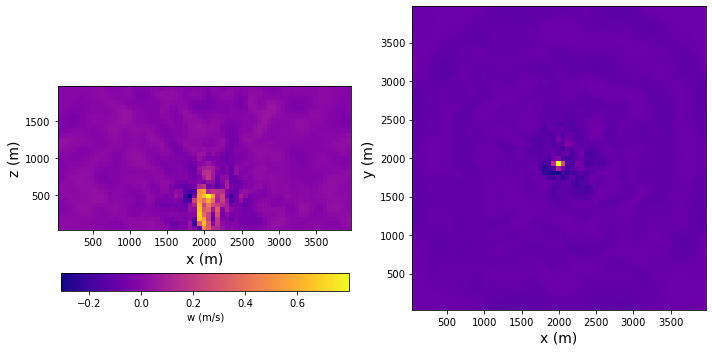

In [31]:
field = var_norot['w']

n = 100
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x (m)', fontsize=14)
ax1.set_ylabel('z (m)', fontsize=14)

ax2 = plt.subplot(122)
ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
ax2.set_xlabel('x (m)', fontsize=14)
ax2.set_ylabel('y (m)', fontsize=14)

cbaxes = fig.add_axes([0.09, 0.18, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w (m/s)') 

#plt.tight_layout()